In [2]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])
albany_df = df[df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True)
albany_df["AveragePrice"].plot()


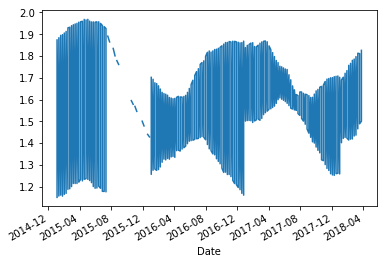

In [3]:
albany_df['AveragePrice'].rolling(25).mean().plot()

In [4]:
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,NaN
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,NaN
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,NaN


In [6]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-01-21,9,1.54,3346.54,14.67,253.01,0.0,3078.86,3078.86,0.00,0.0,organic,2018,Albany,1.7208
2018-01-14,10,1.47,4140.95,7.30,301.87,0.0,3831.78,3831.78,0.00,0.0,organic,2018,Albany,1.7028
2018-01-07,11,1.54,4816.90,43.51,412.17,0.0,4361.22,4357.89,3.33,0.0,organic,2018,Albany,1.6900


In [7]:
albany_df.dropna().head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-07-12,24,1.05,124055.31,672.25,94693.52,4257.64,24431.90,24290.08,108.49,33.33,conventional,2015,Albany,1.1776
2015-07-05,25,1.35,109252.12,869.45,72600.55,5883.16,29898.96,29663.19,235.77,0.00,conventional,2015,Albany,1.1784
2015-06-28,26,1.37,89534.81,664.23,57545.79,4662.71,26662.08,26311.76,350.32,0.00,conventional,2015,Albany,1.1792


In [8]:
albany_df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()


In [13]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
graph_df = pd.DataFrame()

for region in df["region"].unique()[:16]:
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]
    
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])


Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [16]:
# Better way to do above without exploding RAM

import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df["type"] == "organic"]
df["Date"] = pd.to_datetime(df["Date"])

graph_df = pd.DataFrame()

for region in df["region"].unique():
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]
    
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])


graph_df.tail()
    


Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,...,1.6184,1.5728,1.7116,2.1544,1.9240,1.3156,1.7204,1.7144,1.8620,1.8708
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,...,1.5952,1.5592,1.6868,2.1040,1.8868,1.3004,1.7104,1.6940,1.8220,1.8372
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,...,1.5612,1.5400,1.6484,2.0552,1.8468,1.2932,1.6916,1.6748,1.7912,1.8052
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,...,1.5312,1.5204,1.6156,2.0012,1.8192,1.2848,1.6776,1.6588,1.7644,1.7772
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,...,1.5004,1.5072,1.5820,1.9496,1.7976,1.2700,1.6484,1.6428,1.7304,1.7472


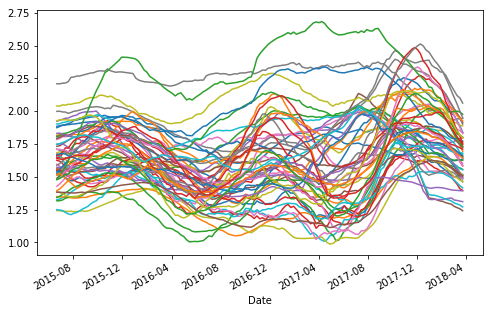

In [21]:
graph_df.dropna().plot(figsize=(8,5), legend=False)